In [2]:
pip install --upgrade pandas prophet

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Importamos las librerías
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import openpyxl
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from scipy import sparse

from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="prophet.plot")

In [4]:
# Ruta de los datos
df1 = pd.read_excel('/Users/fernandopradagorge/Documents/Documentos - MacBook Pro de Fernando/Universidad/Master Data Science and AI/Nuclio Projects/Projects/Evolución ventas vehículos particulares/Lista detallada de ventas.xlsx')

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   V                      7906 non-null   object        
 1   Fecha                  7904 non-null   datetime64[ns]
 2   V/A                    7904 non-null   object        
 3   IDV                    7904 non-null   float64       
 4   Origen                 7904 non-null   object        
 5   Referencia             7904 non-null   float64       
 6   Tipo Vehículo          7686 non-null   object        
 7   Matricula              7814 non-null   object        
 8   Marca                  7904 non-null   object        
 9   Modelo                 7904 non-null   object        
 10  Canal                  7904 non-null   object        
 11  Facturación            7905 non-null   float64       
 12  Facturación (media)    7905 non-null   float64       
 13  Imp

In [6]:
df1.head()

,V,Fecha,V/A,IDV,Origen,Referencia,Tipo Vehículo,Matricula,Marca,Modelo,...,Cambio,Kilómetros,Fecha Matric.,Segmento,SubSegmento,Importe Remarketing,Margen I,Margen II,Margen III,Margen IV
0,1,2024-01-18,V,156385.0,VO,31114932.0,MOTOS,6457GSW,PIAGGIO,PIAGGIO VESPA 50CC,...,AUTOMATICO,72940.0,2010-01-18,NaN,NaN,0.00,82.65,82.65,-48.56,-48.56
1,1,2023-03-21,V,156385.0,VO,28637837.0,MOTOS,6457GSW,PIAGGIO,PIAGGIO VESPA 50CC,...,AUTOMATICO,72940.0,2010-01-18,NaN,NaN,0.00,413.22,413.22,476.84,476.84
2,1,2023-06-29,V,159474.0,VO,29507497.0,TURISMOS,5383GTM,FORD,FOCUS,...,MANUAL,124380.0,2010-02-22,Turismos,Segmento C,0.00,991.73,991.73,855.35,855.35
3,1,2024-03-18,V,200955.0,VO,31567110.0,TURISMOS,4134HSR,OPEL,OPEL CORSA,...,MANUAL,106772.0,2013-08-29,Turismos,Segmento B,1347.61,4123.97,4123.97,2861.92,2861.92
4,1,2023-01-16,V,205707.0,VO,28058110.0,TURISMOS,1962HTZ,ALFA,GIULIETTA,...,MANUAL,66511.0,2013-12-18,Turismos,Segmento C,0.00,2300.51,2300.51,1618.87,1618.87


### EDA

In [7]:
df1.columns

Index(['V', 'Fecha', 'V/A', 'IDV', 'Origen', 'Referencia', 'Tipo Vehículo',
       'Matricula', 'Marca', 'Modelo', 'Canal', 'Facturación',
       'Facturación (media)', 'Importe Venta (media)', 'Margen', 'Financiado',
       'Imp. Financiado', 'Interés', 'Financiera', 'NumeroCuotas',
       'Concesionario', 'Vendedor', 'Comprador', 'Días en Stock', 'Bastidor',
       'Combustible', 'Cambio', 'Kilómetros', 'Fecha Matric.', 'Segmento',
       'SubSegmento', 'Importe Remarketing', 'Margen I', 'Margen II',
       'Margen III', 'Margen IV'],
      dtype='object')

In [8]:
df1 = df1.drop(['Referencia', 'Canal', 'Matricula', 'Financiado', 'Imp. Financiado', 'Interés', 'Financiera', 'NumeroCuotas', 'Vendedor', 'Comprador', 'Bastidor', 'Kilómetros', 'V', 'V/A', 'IDV', 'Margen I', 'Margen II', 'Margen III', 'Margen IV', 'Segmento', 'SubSegmento', 'Fecha Matric.', 'Cambio', 'Días en Stock', 'Importe Remarketing', 'Margen'], axis = 1)

In [9]:
df1.columns

Index(['Fecha', 'Origen', 'Tipo Vehículo', 'Marca', 'Modelo', 'Facturación',
       'Facturación (media)', 'Importe Venta (media)', 'Concesionario',
       'Combustible'],
      dtype='object')

In [10]:
df2 = df1.copy()

In [11]:
df2.columns

Index(['Fecha', 'Origen', 'Tipo Vehículo', 'Marca', 'Modelo', 'Facturación',
       'Facturación (media)', 'Importe Venta (media)', 'Concesionario',
       'Combustible'],
      dtype='object')

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Fecha                  7904 non-null   datetime64[ns]
 1   Origen                 7904 non-null   object        
 2   Tipo Vehículo          7686 non-null   object        
 3   Marca                  7904 non-null   object        
 4   Modelo                 7904 non-null   object        
 5   Facturación            7905 non-null   float64       
 6   Facturación (media)    7905 non-null   float64       
 7   Importe Venta (media)  7905 non-null   float64       
 8   Concesionario          7904 non-null   object        
 9   Combustible            7224 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 617.9+ KB


In [13]:
df2 = df2.drop(['Concesionario', 'Tipo Vehículo'], axis = 1)

In [14]:
df2.isnull().sum()

Fecha                      3
Origen                     3
Marca                      3
Modelo                     3
Facturación                2
Facturación (media)        2
Importe Venta (media)      2
Combustible              683
dtype: int64

In [15]:
# Eliminar los 3 nulos de la columna 'Fecha' ya que no son significativos para el modelo
df2.dropna(subset = ['Fecha'], inplace = True)

In [16]:
# Establecer la columan 'Fecha' como índice 
df2.set_index('Fecha', inplace = True)

### Imputación de valores nulos

In [17]:
# Definir las transformaciones para las columnas numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', MinMaxScaler())
])

In [18]:
# Definir las transfformaciones para las columnas categórica
categorical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown ='ignore'))
])

In [19]:
# Crear el transformador de columnas usando el ColumnTransform
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, df2.select_dtypes(include=['float64', 'int64']).columns),
    ('cat', categorical_transformer, df2.select_dtypes(include=['object']).columns)
])

In [20]:
# Crear la pipeline
pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor)
])

In [21]:
# Aplicar el pipeline al DataFrame
df2_transformed = pipeline.fit_transform(df2)

In [22]:
print("Forma del DataFrame transformado:", df2_transformed.shape)

Forma del DataFrame transformado: (7904, 431)


In [23]:
category_columns = pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['encoder'].get_feature_names_out()
new_columns = list(df2.select_dtypes(include=['float64', 'int64']).columns) + list(category_columns)

In [24]:
print("Verificación final antes de crear el DataFrame:")
print("Forma del df2_transformed:", df2_transformed.shape)
print("Dimensiones esperadas de new_columns:", len(new_columns))

Verificación final antes de crear el DataFrame:
Forma del df2_transformed: (7904, 431)
Dimensiones esperadas de new_columns: 431


In [25]:
# Convertir la matriz dispersa a una matriz densa si es necesario
if sparse.issparse(df2_transformed):
    print("Converting sparse matrix to dense matrix...")
    df2_transformed = df2_transformed.toarray()

if df2_transformed.shape[1] == len(new_columns):
    df2_final = pd.DataFrame(df2_transformed, index=df2.index, columns=new_columns)
    print("DataFrame final creado con éxito:")
    print(df2_final.head())
else:
    print("Incongruencia en el número de columnas:", df2_transformed.shape[1], "esperado:", len(new_columns))


Converting sparse matrix to dense matrix...
DataFrame final creado con éxito:
            Facturación  Facturación (media)  Importe Venta (media)  x0_KM0  \
Fecha                                                                         
2024-01-18     0.380065             0.009954               0.008965     0.0   
2023-03-21     0.378384             0.007269               0.006546     0.0   
2023-06-29     0.386024             0.019470               0.018843     0.0   
2024-03-18     0.409839             0.057503               0.051786     0.0   
2023-01-16     0.424827             0.081440               0.073342     0.0   

            x0_VN  x0_VO  x1_ABARTH  x1_ALFA  x1_APRILIA  x1_AUDI  ...  \
Fecha                                                              ...   
2024-01-18    0.0    1.0        0.0      0.0         0.0      0.0  ...   
2023-03-21    0.0    1.0        0.0      0.0         0.0      0.0  ...   
2023-06-29    0.0    1.0        0.0      0.0         0.0      0.0  ...  

In [26]:
df2_final.head()

,Facturación,Facturación (media),Importe Venta (media),x0_KM0,x0_VN,x0_VO,x1_ABARTH,x1_ALFA,x1_APRILIA,x1_AUDI,...,x2_ZONTES,x2_ZS,x3_1.0 Ecoboost 100cv,x3_DIESEL,x3_ELECTRICO,x3_GASOLINA,x3_HIBRIDO,x3_HIBRIDO ENCHUFABLE,x3_MICROHIBRIDO,x3_MICROHIBRIDO DIESEL
Fecha,,,,,,,,,,,,,,,,,,,,,
2024-01-18,0.380065,0.009954,0.008965,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2023-03-21,0.378384,0.007269,0.006546,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2023-06-29,0.386024,0.019470,0.018843,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2024-03-18,0.409839,0.057503,0.051786,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-16,0.424827,0.081440,0.073342,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Preparación de Prophet

In [27]:
# Preparar DF para el Prophet
# Asumiendo que la columna 'Facturación' es un buen representante de las ventas de coches
df_prophet = df2_final.reset_index().rename(columns = {'Fecha': 'ds', 'Facturación': 'y'})

In [28]:
df_prophet.columns

Index(['ds', 'y', 'Facturación (media)', 'Importe Venta (media)', 'x0_KM0',
       'x0_VN', 'x0_VO', 'x1_ABARTH', 'x1_ALFA', 'x1_APRILIA',
       ...
       'x2_ZONTES', 'x2_ZS', 'x3_1.0 Ecoboost 100cv', 'x3_DIESEL',
       'x3_ELECTRICO', 'x3_GASOLINA', 'x3_HIBRIDO', 'x3_HIBRIDO ENCHUFABLE',
       'x3_MICROHIBRIDO', 'x3_MICROHIBRIDO DIESEL'],
      dtype='object', length=432)

In [29]:
# Inicializar el modelo de Prophet
# Se activan lad tendencias, diarias, semanales y anuales
model = Prophet(yearly_seasonality = True, weekly_seasonality = True, daily_seasonality = False)

In [30]:
# Añadir las festividades de España
model.add_country_holidays(country_name = 'ES')

In [31]:
# Ajustar el modelo
df_prophet = df2_final.reset_index().rename(columns = {'Fecha': 'ds', 'Facturación': 'y'})
model.fit(df_prophet[['ds', 'y']])

01:13:17 - cmdstanpy - INFO - Chain [1] start processing


01:13:18 - cmdstanpy - INFO - Chain [1] done processing


### Predicciones futuras

In [32]:
# Crear el DataFrame para predicciones futuras
future = model.make_future_dataframe(periods = 365)

In [33]:
# Realizar las predicciones
forecast = model.predict(future)

### Gráficos

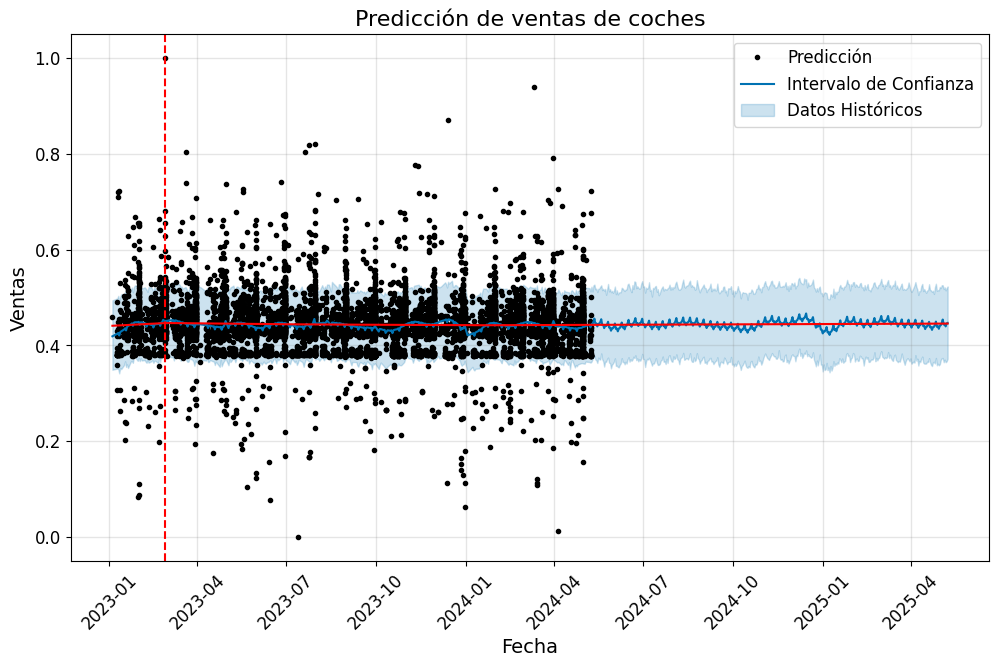

In [34]:
# Visualizar las predicciones
fig = model.plot(forecast, figsize = (10, 6))

a = add_changepoints_to_plot(fig.gca(), model, forecast)

ax = fig.gca()
ax.set_title('Predicción de ventas de coches', fontsize = 16)
ax.set_xlabel('Fecha', fontsize = 14)
ax.set_ylabel('Ventas', fontsize = 14)
ax.tick_params(axis = 'x', labelrotation = 45)
ax.tick_params(axis = 'both', labelsize = 12)

# Leyenda
ax.legend(['Predicción', 'Intervalo de Confianza', 'Datos Históricos'], fontsize = 12)

plt.show()

## Predicción de Ventas de Coches

El gráfico muestra la predicción de ventas de coches basada en el modelo Prophet, desglosando las ventas reales en comparación con las predicciones futuras.

### Componentes del Gráfico

- **Puntos Negros**: Representan los datos históricos de ventas de coches. Cada punto es una observación de las ventas en un día específico.

- **Línea Azul**: Esta línea muestra la tendencia central de las predicciones del modelo. La línea sigue la tendencia deducida de los datos históricos y proyecta esta tendencia hacia el futuro.

- **Área Azul Clara**: Denota el intervalo de confianza de las predicciones. Esta área sombreada muestra dónde el modelo predice que las ventas reales podrían variar, con una probabilidad del 80% (o cualquier otro porcentaje configurado) de que las ventas reales estén dentro de este rango.

- **Línea Roja Punteada**: Indica el punto en el tiempo donde el modelo comienza a hacer predicciones basadas en el análisis de los datos históricos. Las fechas a la izquierda son datos históricos, mientras que a la derecha están las proyecciones futuras.

### Escala del Eje Y

La escala del eje y está normalizada entre 0 y 1. Esto se hace típicamente para facilitar la comparación entre diferentes series de tiempo o para cumplir con los requisitos del modelo estadístico. En este caso, la normalización permite una interpretación clara de la tendencia y la estacionalidad sin ser distorsionada por valores absolutos que podrían variar significativamente entre diferentes periodos o contextos de venta. Esta escala es especialmente útil en el análisis predictivo donde la consistencia de la escala ayuda a identificar patrones más claramente.

### Interpretación

El modelo sugiere una tendencia generalmente estable en las ventas de coches con fluctuaciones menores a lo largo del tiempo. La predicción indica que esta tendencia se mantendrá en el futuro cercano, aunque con variaciones que reflejan la estacionalidad y otros factores influyentes detectados por el modelo.

### Uso Estratégico

Estas predicciones son vitales para la planificación estratégica en marketing y operaciones. Por ejemplo, el equipo de marketing puede usar esta información para planear campañas dirigidas durante períodos de alta demanda proyectada. Igualmente, la gestión de inventario puede ser optimizada para asegurar que la oferta coincida con la demanda esperada, maximizando así la eficiencia y la rentabilidad.

### Conclusión

El análisis predictivo, como el mostrado en este gráfico, proporciona una herramienta esencial para anticipar cambios en el mercado y ajustar las estrategias empresariales de manera proactiva. Esta capacidad de anticipar el futuro basándose en datos pasados permite a la empresa mantenerse competitiva y alineada con las tendencias del mercado.

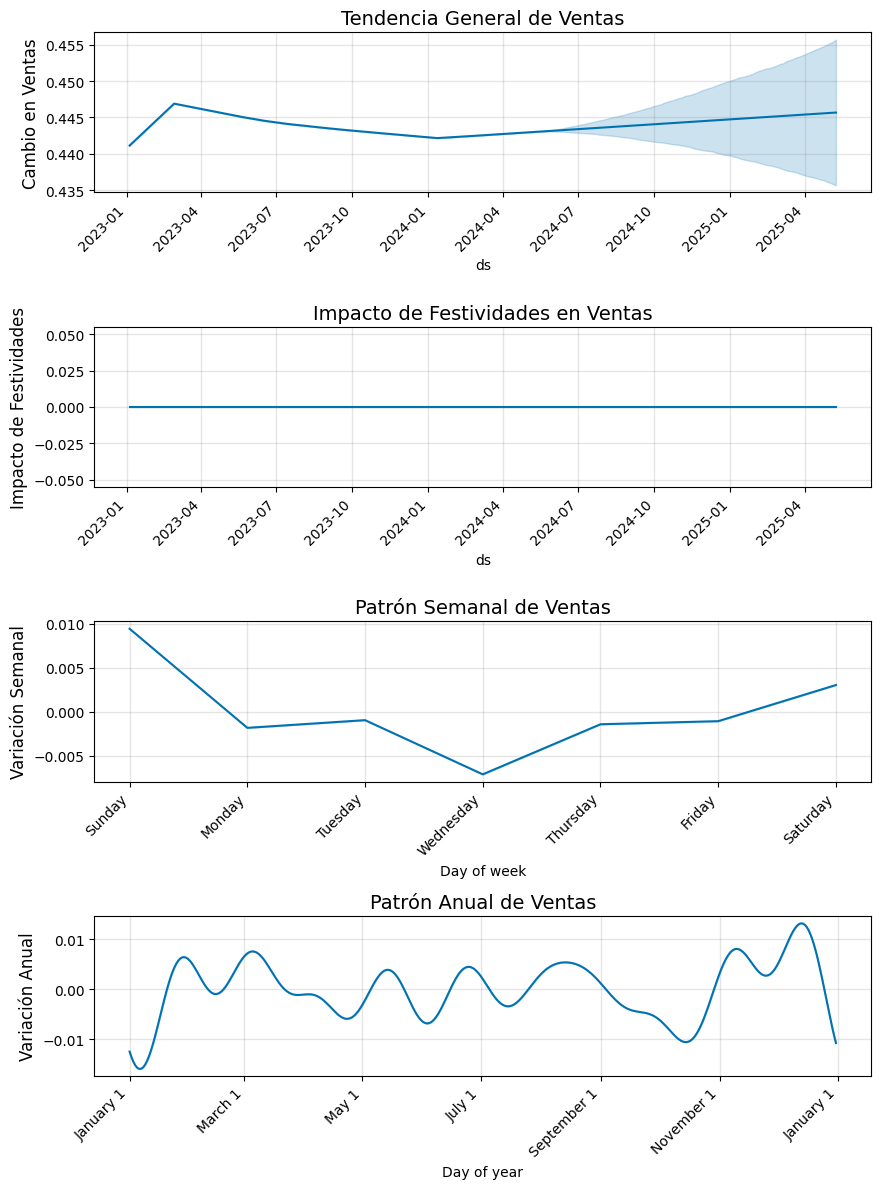

In [35]:
# Generar la figura con los componentes del modelo
fig2 = model.plot_components(forecast)
axes = fig2.get_axes()

# Cambiar las etiquetas del eje y para cada gráfico
axes[0].set_ylabel('Cambio en Ventas', fontsize=12)  # Tendencia
axes[1].set_ylabel('Impacto de Festividades', fontsize=12)  # Festividades
axes[2].set_ylabel('Variación Semanal', fontsize=12)  # Estacionalidad Semanal
axes[3].set_ylabel('Variación Anual', fontsize=12)  # Estacionalidad Anual

# Ajustar el título para cada gráfico
axes[0].set_title('Tendencia General de Ventas', fontsize=14)
axes[1].set_title('Impacto de Festividades en Ventas', fontsize=14)
axes[2].set_title('Patrón Semanal de Ventas', fontsize=14)
axes[3].set_title('Patrón Anual de Ventas', fontsize=14)

# Rotar las etiquetas del eje x donde sea necesario
for ax in axes:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')

# Ajustar el espacio para evitar solapamientos
plt.tight_layout()

# Mostrar la figura
plt.show()


## Análisis Detallado de Componentes de las Ventas de Coches

A continuación, se presenta un desglose de los diferentes componentes que afectan las predicciones de ventas de coches, utilizando el modelo Prophet. Cada gráfico proporciona insights sobre distintos factores que influyen en las tendencias de ventas.

### Tendencia General de Ventas

- **Gráfico Superior**: Este gráfico muestra la tendencia subyacente en las ventas de coches a lo largo del tiempo. Podemos observar una tendencia generalmente constante con una ligera disminución a mediados del período observado. La sombra azul alrededor de la línea de tendencia muestra el intervalo de confianza, lo que indica dónde se espera que fluctúen las ventas con una cierta probabilidad.

### Impacto de Festividades en Ventas

- **Segundo Gráfico**: Representa el impacto estimado de las festividades en las ventas de coches. Este componente muestra cómo días específicos, como festivos nacionales o locales, pueden influir en las ventas. La línea horizontal indica la ausencia de un impacto significativo de festividades en la mayoría de los períodos, con excepciones en fechas particulares que requieren una investigación adicional para identificar eventos específicos.

### Patrón Semanal de Ventas

- **Tercer Gráfico**: Muestra cómo varían las ventas de coches a lo largo de la semana. Este análisis es crucial para optimizar la fuerza laboral y las campañas de marketing en días específicos de la semana que muestran mayores ventas, como se observa hacia el final de la semana.

### Patrón Anual de Ventas

- **Último Gráfico**: Ilustra la estacionalidad anual de las ventas de coches. Claramente visible, las ventas fluctúan significativamente a lo largo del año, lo cual es vital para la planificación de la producción y las actividades promocionales. Los picos y valles pueden corresponder a temporadas de compras altas y bajas, influenciadas por factores económicos, climáticos y sociales.

### Explicación de la Escala del Eje Y

En todos los gráficos, el eje y representa una medida normalizada o ajustada de las ventas, lo que permite una comparación más fácil entre diferentes periodos o componentes sin ser afectada por la magnitud absoluta de las ventas. Esta escala es particularmente útil para visualizar y comparar las variaciones relativas y tendencias dentro de los datos, independientemente del volumen total de ventas. Utilizar esta escala normalizada ayuda a identificar los patrones más claramente y a hacer inferencias más precisas sobre el comportamiento de las ventas a lo largo del tiempo.

### Conclusión

El entendimiento detallado de estos componentes ayuda a los equipos de marketing y ventas a desarrollar estrategias más informadas y eficaces. Al anticipar las tendencias y ajustarse a los patrones de compra observados, la empresa puede mejorar significativamente su alcance en el mercado y optimizar sus recursos de manera efectiva.


### Predicciones para Mayo y Junio de 2024

In [36]:
# Filtrar las predicciones para Mayo y Junio
mask = (forecast['ds'] >= '2024-05-01') & (forecast['ds'] <= '2024-06-30')
may_june_forecast = forecast.loc[mask]

In [37]:
# Cálculo del porcentaje de cambio diario en la predicción
may_june_forecast['percent_change'] = may_june_forecast['yhat'].pct_change() * 100

/var/folders/hn/58jsz1wd6jn8ypqlsj_ym3sc0000gn/T/ipykernel_13599/2659897296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  may_june_forecast['percent_change'] = may_june_forecast['yhat'].pct_change() * 100


In [38]:
# Limpiar los datos del gráfico para eliminar los posibles NaN que hubierann surgido del cálculo anterior
may_june_forecast = may_june_forecast.dropna(subset = ['percent_change'])

In [39]:
# Preparar el gráfico
plot_data = may_june_forecast[['ds', 'percent_change']]

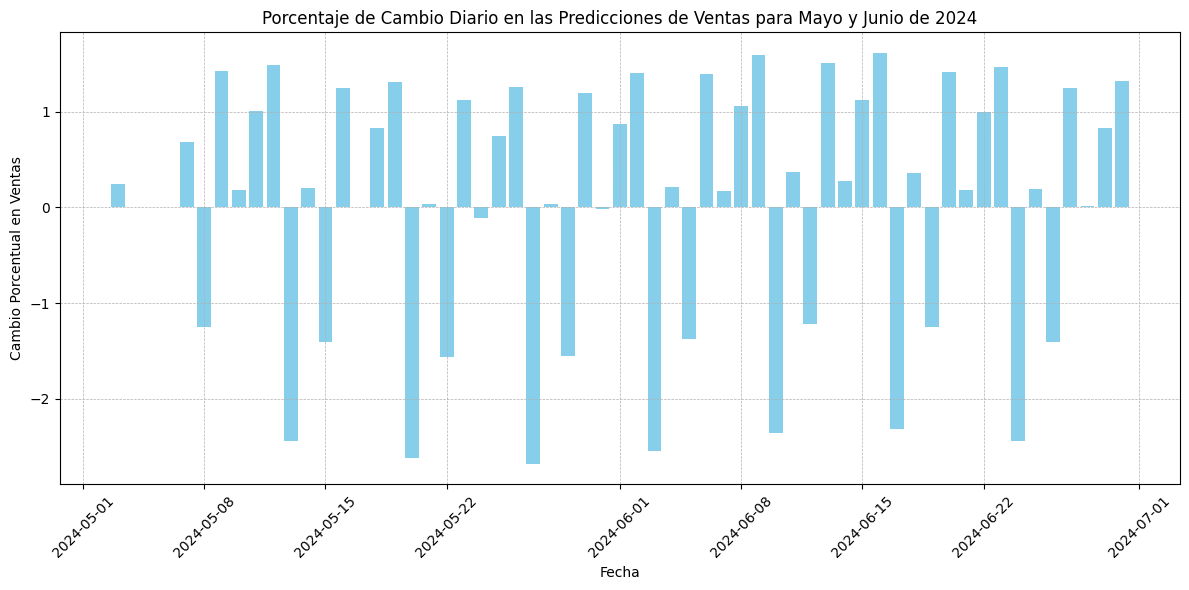

In [40]:
plt.figure(figsize=(12, 6))
plt.bar(plot_data['ds'], plot_data['percent_change'], color='skyblue')

# Añadir etiquetas y título al gráfico
plt.title('Porcentaje de Cambio Diario en las Predicciones de Ventas para Mayo y Junio de 2024')
plt.xlabel('Fecha')
plt.ylabel('Cambio Porcentual en Ventas')

# Mejorar el formato de la fecha en el eje x para mejorar la legibilidad
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## Análisis del Cambio Diario en las Predicciones de Ventas para Mayo y Junio de 2024

Este gráfico muestra el cambio porcentual diario en las predicciones de ventas para los meses de mayo y junio de 2024. Cada barra representa la variación porcentual de las ventas predichas de un día para el siguiente dentro de este período.

### Observaciones Clave

- **Volatilidad en las Ventas**: Las barras varían significativamente de un día para otro, indicando una notable volatilidad en las predicciones de ventas. Esto sugiere fluctuaciones en las condiciones del mercado o en el comportamiento del consumidor que podrían estar influenciando las ventas diarias.

- **Días con Grandes Cambios**: Los días que muestran un cambio porcentual particularmente alto o bajo merecen una atención especial. Por ejemplo, los picos positivos podrían indicar días en los que se espera un aumento en la actividad promocional o eventos especiales que impulsan las ventas. De manera similar, las caídas pronunciadas podrían reflejar días con posibles desafíos, como competencia intensa o factores externos negativos.

- **Planificación Estratégica**: Para el equipo de marketing, entender estos cambios es crucial para planificar campañas eficaces. Por ejemplo, invertir más en publicidad y promociones durante los días esperados de alta venta puede maximizar el rendimiento de la inversión. Contrariamente, identificar días de baja predicción podría ayudar a planificar estrategias para estimular la demanda.

### Acciones Recomendadas para Marketing

1. **Análisis de Causa**: Investigar las causas detrás de los grandes cambios porcentuales en las predicciones para adaptar las estrategias de marketing y promoción de manera más efectiva.
2. **Alineación con Eventos**: Coordinar las promociones y eventos de marketing con los días de altas predicciones para aprovechar el potencial de mercado.
3. **Gestión de Riesgos**: Preparar planes de contingencia para los días con predicciones de baja venta para mitigar posibles pérdidas.

### Conclusión

El entendimiento detallado de la volatilidad en las predicciones de ventas ayuda a alinear mejor las operaciones y estrategias de marketing con las dinámicas del mercado. Este análisis proporciona una base para decisiones informadas que pueden optimizar la eficacia de las actividades comerciales y promocionales planificadas para mayo y junio de 2024.


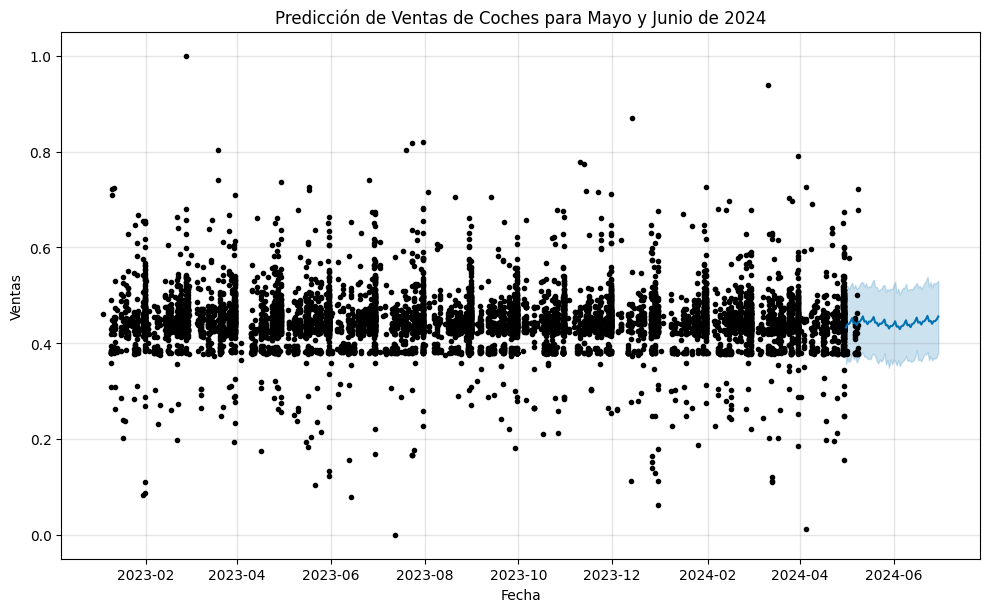

In [41]:
# Crear un DataFrame con las fechas específicas de mayo y junio de 2024
start_date = '2024-05-01'
end_date = '2024-06-30'
future_dates = pd.date_range(start=start_date, end=end_date)
future_df = pd.DataFrame({'ds': future_dates})

# Predecir las ventas para esas fechas
forecast = model.predict(future_df)

# Visualizar las predicciones para mayo y junio de 2024
fig = model.plot(forecast)
plt.title('Predicción de Ventas de Coches para Mayo y Junio de 2024')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.show()  

## Análisis de Predicciones de Ventas de Coches para Mayo y Junio de 2024

Este gráfico muestra las predicciones de ventas de coches generadas para los meses de mayo y junio de 2024, utilizando el modelo Prophet. Las predicciones diarias están representadas por puntos negros, distribuidos a lo largo del tiempo desde febrero de 2023 hasta junio de 2024.

### Observaciones Principales

- **Distribución de Predicciones**: Los puntos negros representan las predicciones individuales de ventas de coches para cada día. La densidad de los puntos indica la variabilidad en las predicciones a lo largo del tiempo.

- **Tendencia y Variabilidad**: La línea azul muestra la tendencia central de las predicciones, mientras que el área azul claro alrededor de la línea indica el intervalo de confianza del 80%. Este intervalo sugiere dónde se espera que oscilen las predicciones reales con una cierta probabilidad.

### Interpretación del Eje Y

- **Escala del Eje Y**: El eje y está normalizado entre 0 y 1, donde estos valores representan el mínimo y el máximo de las ventas de coches previstas por el modelo. Esta normalización ayuda a visualizar mejor las fluctuaciones en las predicciones sin estar atado a cifras específicas de ventas, lo que permite una comparación más fácil entre diferentes periodos de tiempo.

### Utilidad del Gráfico

Este gráfico es útil para los planificadores y el equipo de marketing para:

1. **Identificar Tendencias**: Observar cómo se espera que cambien las ventas de coches a lo largo del tiempo, ayudando a anticipar períodos de alta o baja demanda.
2. **Planificación de Recursos**: Ajustar los niveles de inventario y los esfuerzos de marketing en función de las predicciones de ventas anticipadas.
3. **Estrategia de Precios**: Optimizar las estrategias de precios basadas en la demanda esperada, maximizando así los ingresos y la participación de mercado.

### Conclusión

Las predicciones de ventas proporcionan insights valiosos que pueden ayudar a dirigir estrategias comerciales y de marketing más efectivas. Al entender las tendencias futuras y la variabilidad en las predicciones, la empresa puede tomar decisiones más informadas que alineen mejor sus objetivos operativos y estratégicos con las condiciones del mercado esperadas.

### DataFrame con las predicciones de Mayo y Junio

In [42]:
# Seleccionar las columnas relevantes
sales_predictions = may_june_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [43]:
# Renombrar las columnas para un mejor entendimiento
sales_predictions.columns = ['Fecha', 'Predicción de Ventas', 'Límite Inferior', 'Límite Superior']

In [44]:
# Ajustes en la escala de ventas para mejor presentación y comprensión
sales_predictions.loc[:, 'Predicción de Ventas'] = (sales_predictions['Predicción de Ventas'] / 100) * 100
sales_predictions.loc[:, 'Límite Inferior'] = (sales_predictions['Límite Inferior'] / 100) * 100
sales_predictions.loc[:, 'Límite Superior'] = (sales_predictions['Límite Superior'] / 100) * 100

# Redondeo de cantidades
sales_predictions = sales_predictions.round({
    'Predicción de Ventas': 0,
    'Límite Inferior': 0,
    'Límite Superior': 0
})

# Convertir a enteros para su presentación
sales_predictions['Predicción de Ventas'] = sales_predictions['Predicción de Ventas'].astype(int)
sales_predictions['Límite Inferior'] = sales_predictions['Límite Inferior'].astype(int)
sales_predictions['Límite Superior'] = sales_predictions['Límite Superior'].astype(int)

In [45]:
sales_predictions.head(10)

,Fecha,Predicción de Ventas,Límite Inferior,Límite Superior
327,2024-05-03,0,0,1
328,2024-05-07,0,0,1
329,2024-05-08,0,0,1
330,2024-05-09,0,0,1
331,2024-05-10,0,0,1
332,2024-05-11,0,0,1
333,2024-05-12,0,0,1
334,2024-05-13,0,0,1
335,2024-05-14,0,0,1
336,2024-05-15,0,0,1


### Predicciones por Marca

In [46]:
# Comprobar como están nombradas las columnnas de las marcas
df_prophet.columns

Index(['ds', 'y', 'Facturación (media)', 'Importe Venta (media)', 'x0_KM0',
       'x0_VN', 'x0_VO', 'x1_ABARTH', 'x1_ALFA', 'x1_APRILIA',
       ...
       'x2_ZONTES', 'x2_ZS', 'x3_1.0 Ecoboost 100cv', 'x3_DIESEL',
       'x3_ELECTRICO', 'x3_GASOLINA', 'x3_HIBRIDO', 'x3_HIBRIDO ENCHUFABLE',
       'x3_MICROHIBRIDO', 'x3_MICROHIBRIDO DIESEL'],
      dtype='object', length=432)

In [47]:
# Filtrar las columnas que corresponden a cada marca 
marca_columns = [col for col in df_prophet.columns if 'x1_' in col]

In [48]:
# Sumar las predicciones por cada marca
marca_predictions = pd.DataFrame(df_prophet[marca_columns].sum(), columns = ['Total de Ventas'])

In [49]:
# Resetear el índice para crear el gráfico
marca_predictions.reset_index(inplace=True)
marca_predictions.rename(columns={'index': 'Marca'}, inplace=True)

In [50]:
# Eliminar las columnas duplicadas de 'Marca' excepto la que contiene los nombre de las marcas
marca_predictions = marca_predictions.loc[:, ~marca_predictions.columns.duplicated(keep='last')]

#Cambiar el nombre de la última columna 'Marca' que contiene los nombres de las marcas
marca_predictions.columns = ['Total de Ventas' if 'x1_' in col else col for col in marca_predictions.columns]

In [51]:
# Corregir los nombres de las marcas en la columna 'Total de Ventas'
marca_predictions.loc[:, 'Total de Ventas'] = marca_predictions['Total de Ventas'].astype(str).str.replace('x1_', '')

/var/folders/hn/58jsz1wd6jn8ypqlsj_ym3sc0000gn/T/ipykernel_13599/2430541629.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['10.0' '46.0' '154.0' '34.0' '26.0' '160.0' '8.0' '17.0' '1.0' '16.0'
 '9.0' '415.0' '51.0' '813.0' '10.0' '6.0' '2.0' '1.0' '1791.0' '19.0'
 '164.0' '1.0' '73.0' '265.0' '45.0' '5.0' '1.0' '21.0' '13.0' '25.0'
 '1228.0' '1.0' '8.0' '2.0' '61.0' '12.0' '591.0' '62.0' '162.0' '1011.0'
 '64.0' '1.0' '2.0' '162.0' '18.0' '7.0' '8.0' '87.0' '79.0' '130.0' '1.0'
 '4.0' '1.0']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  marca_predictions.loc[:, 'Total de Ventas'] = marca_predictions['Total de Ventas'].astype(str).str.replace('x1_', '')


In [52]:
marca_predictions.loc[:, 'Marca'] = marca_predictions['Marca'].astype(str).str.replace('x1_', '')

In [53]:
marca_predictions.head()

,Marca,Total de Ventas
0,ABARTH,10.0
1,ALFA,46.0
2,APRILIA,154.0
3,AUDI,34.0
4,BMW,26.0


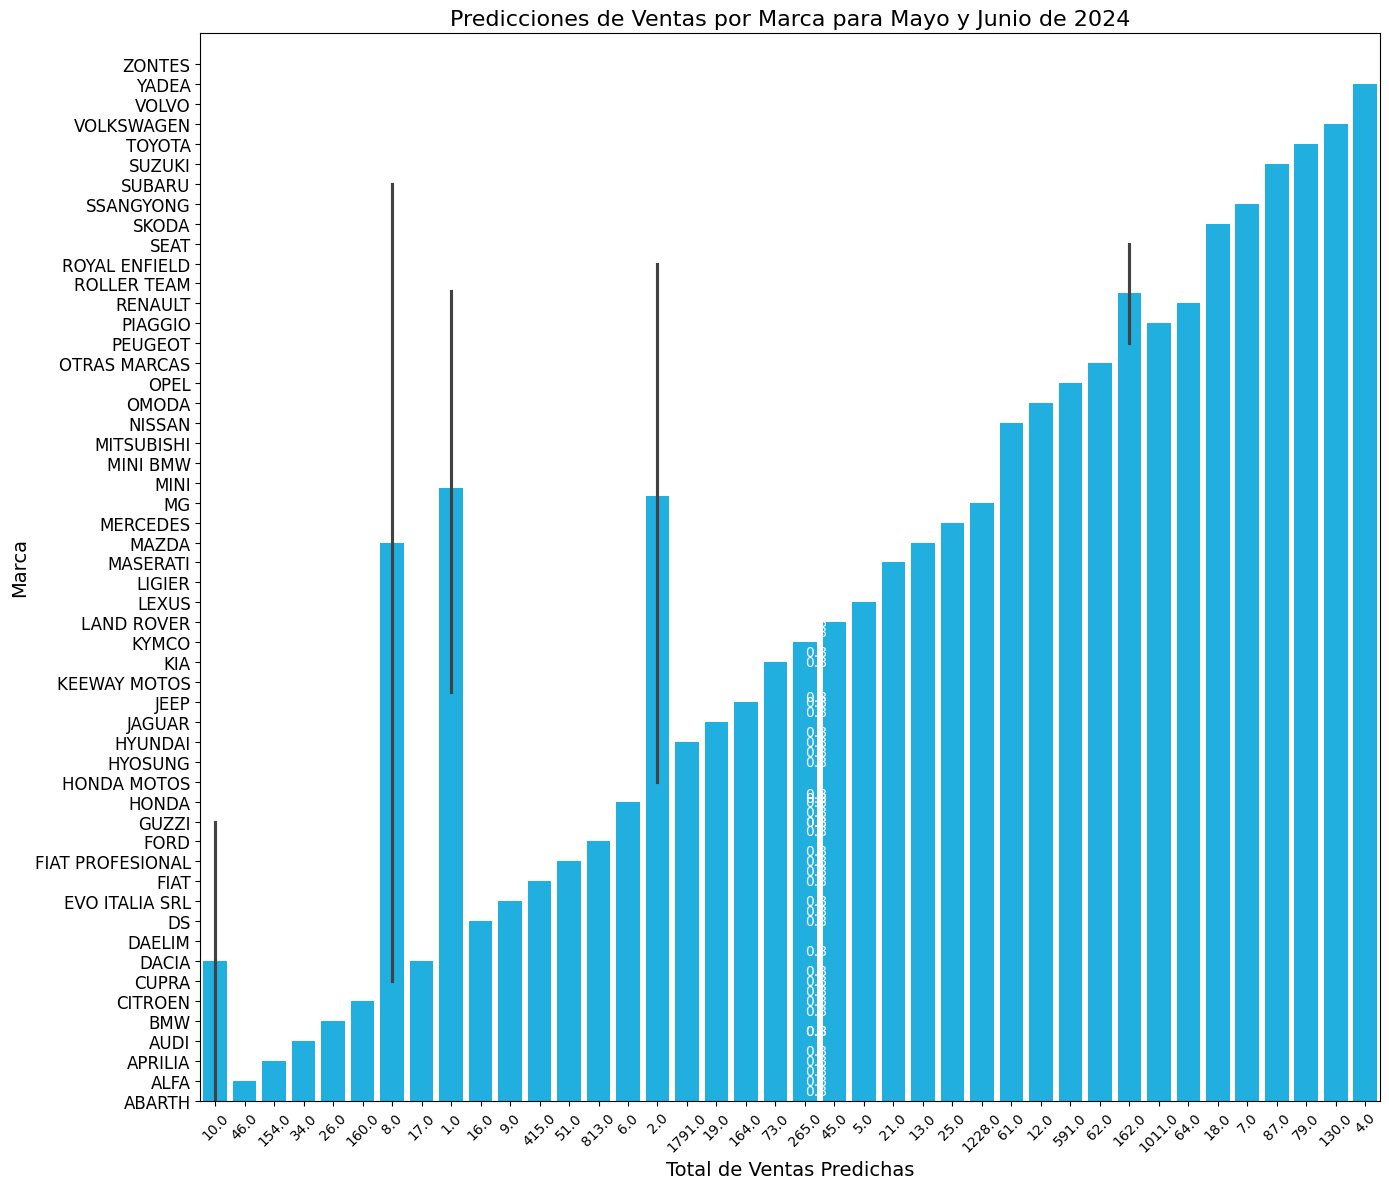

In [54]:
# Crear el gráfico de barras para las predicciones por marca
plt.figure(figsize=(14, 12))
barplot = sns.barplot(data=marca_predictions, y='Marca', x='Total de Ventas', color='deepskyblue')
plt.title('Predicciones de Ventas por Marca para Mayo y Junio de 2024', fontsize=16)
plt.ylabel('Marca', fontsize=14)
plt.xlabel('Total de Ventas Predichas', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=12)

# Invertir el eje y para que las crezcan de abajo hacia arriba
plt.gca().invert_yaxis()

# Mostrar valores en las barras para mayor claridad
for p in barplot.patches:
    width = p.get_width()
    plt.annotate(f'{width:.1f}',  # Formatea los números para tener un decimal
                 (width if width > 20 else 20, p.get_y() + p.get_height() / 2),  # Ajustar la posición x para evitar superposiciones
                 ha='left', va='center',
                 color='black' if width > 20 else 'white',  # Color del texto dependiendo del ancho de la barra
                 fontsize=10)

plt.tight_layout()
plt.show()

### Gráfico con las marcas que nos interesan

In [55]:
marcas_a_mantener = ['ABARTH', 'ALFA', 'CITROEN', 'EVO ITALIA SRL', 'FIAT', 'FITAR PROFESIONAL', 'FORD', 'HYUNDAI', 'JAGUAR', 'JEEP', 'LAND ROVER', 'MASERATI', 'MG', 'OMODA', 'OPEL']

In [56]:
# Filtrar el DataFrame para incluir solo las marcas listadas
marca_predictions_filtered = marca_predictions[marca_predictions['Marca'].isin(marcas_a_mantener)]

In [57]:
marca_predictions_filtered

,Marca,Total de Ventas
0,ABARTH,10.0
1,ALFA,46.0
5,CITROEN,160.0
10,EVO ITALIA SRL,9.0
11,FIAT,415.0
13,FORD,813.0
18,HYUNDAI,1791.0
19,JAGUAR,19.0
20,JEEP,164.0
24,LAND ROVER,45.0


In [58]:
marca_predictions_filtered[['Marca', 'Total de Ventas']].head()

,Marca,Total de Ventas
0,ABARTH,10.0
1,ALFA,46.0
5,CITROEN,160.0
10,EVO ITALIA SRL,9.0
11,FIAT,415.0


In [63]:
marca_predictions_filtered[['Marca', 'Total de Ventas']]

,Marca,Total de Ventas
10,EVO ITALIA SRL,9.0
13,FORD,813.0
36,OPEL,591.0
1,ALFA,46.0
24,LAND ROVER,45.0
11,FIAT,415.0
27,MASERATI,21.0
19,JAGUAR,19.0
18,HYUNDAI,1791.0
20,JEEP,164.0


TypeError: can only concatenate str (not "float") to str

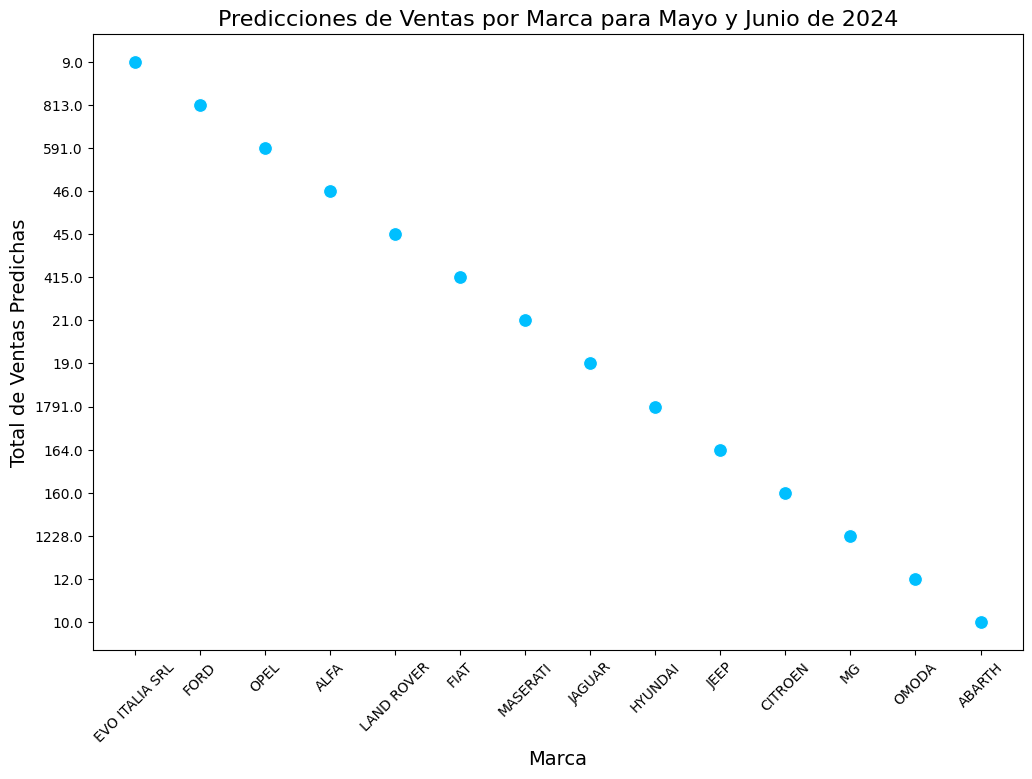

In [68]:
# Ordenar los valores del DataFrame de mayor a menor
marca_predictions_filtered = marca_predictions_filtered.sort_values('Total de Ventas', ascending=False)

# Crear el gráfico de barras horizontales para las predicciones por marca
plt.figure(figsize=(12, 8))  # Ajustar el tamaño para adaptarlo al número de marcas
sns.scatterplot(data=marca_predictions_filtered, x='Marca', y='Total de Ventas', s=100, color='deepskyblue')

# Añadir etiquetas y título
plt.title('Predicciones de Ventas por Marca para Mayo y Junio de 2024', fontsize=16)
plt.ylabel('Total de Ventas Predichas', fontsize=14)
plt.xlabel('Marca', fontsize=14)
plt.xticks(rotation=45, fontsize=10)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.yticks(fontsize=10)

# Añadir anotaciones a cada punto para mostrar los valores exactos de las ventas
for i, row in marca_predictions_filtered.iterrows():
    plt.text(x=row.name, y=row['Total de Ventas'] + 0.02,  # Posición del texto justo arriba del punto
             s=f"{row['Total de Ventas']:.0f}",  # Valor de la venta sin decimales
             ha='center', va='bottom', fontsize=12)
    
plt.tight_layout()
plt.show()

### Consistencia del modelo y precisión de los datos

In [60]:
# Cargar los datos
actual_sales = pd.read_excel('/Users/fernandopradagorge/Documents/Documentos - MacBook Pro de Fernando/Universidad/Master Data Science and AI/Nuclio Projects/Projects/Evolución ventas vehículos particulares/Lista detallada de ventas.xlsx')